In [1]:
DATA_PATH = '../../data/'
LIGHTCURVES_PATH = DATA_PATH + 'lightcurves/'

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

Load transient catalinaID Catalogue

In [4]:
df_out = pd.read_pickle('../../data/' + 'transient_catalinaIDs.pickle')
print(df_out.shape)

(4280, 5)


Load non-transient Light Curves

In [5]:
filename = 'nontransient_lightcurves.pickle'
indir = LIGHTCURVES_PATH; filepath = indir + filename
df_lcs = pd.read_pickle(filepath)
df_lcs['CatalinaID'] = pd.to_numeric(df_lcs.ID.str[6:])
print(df_lcs.ID.unique().shape)

(16940,)


Check that nontransient Lightcurve IDs are not in the transients CatalinaIDs

In [6]:
any_exist = False
catalinaID_list = df_out.CatalinaID.unique()
for lcs_id in df_lcs.CatalinaID.astype(np.int64).unique():
    curr_exists = lcs_id in catalinaID_list
    any_exist = any_exist or curr_exists
print('Any exist:', str(any_exist))

Any exist: False


Describre non-transients observation count

In [7]:
df_lcs_numobs = df_lcs.groupby('ID')['Mag'].count()

In [8]:
df_lcs_numobs.describe()

count    16940.000000
mean       113.601476
std        129.259273
min          1.000000
25%         16.000000
50%         61.000000
75%        176.000000
max       1266.000000
Name: Mag, dtype: float64

Date of first observation

In [9]:
df_lcs.sort_values(['MJD'])['MJD'].iloc[0]

53464.153989999999

Count number of objects with at least 5 observations

In [10]:
df_filtered = df_lcs.groupby('ID', as_index=False).count()
df_filtered = df_filtered.rename(columns={'Mag':'ObsCount'})
df_filtered = df_filtered[df_filtered.ObsCount >= 5]
df_filtered.shape[0]

15263

Describe non-transients observation count (with observations >= 5)

In [11]:
df_lcs_numobs_filtered = df_lcs[df_lcs.ID.isin(df_filtered.ID)].groupby('ID')['Mag'].count()

In [12]:
df_lcs_numobs_filtered.describe()

count    15263.000000
mean       125.816026
std        130.524070
min          5.000000
25%         27.000000
50%         75.000000
75%        195.000000
max       1266.000000
Name: Mag, dtype: float64

Count number of objects with at least 10 observations

In [13]:
df_filtered = df_lcs.groupby('ID', as_index=False).count()
df_filtered = df_filtered.rename(columns={'Mag':'ObsCount'})
df_filtered = df_filtered[df_filtered.ObsCount >= 10]
df_filtered.shape[0]

13913

Describe non-transients observation count (with observations >= 10)

In [14]:
df_lcs_numobs_filtered = df_lcs[df_lcs.ID.isin(df_filtered.ID)].groupby('ID')['Mag'].count()

In [15]:
df_lcs_numobs_filtered.describe()

count    13913.000000
mean       137.361676
std        131.081377
min         10.000000
25%         38.000000
50%         88.000000
75%        210.000000
max       1266.000000
Name: Mag, dtype: float64

In [67]:
def plot_lightcurve(lc):
    plot = lc.plot(x='MJD', y='Mag', marker='x', markeredgecolor='black', linestyle='None', legend=False, figsize=(7,7),ylim=(17,22))
    plot.set_xlabel('Modified Julian Date')
    plot.set_ylabel('Mag')

In [68]:
df = df_lcs[df_lcs.ID.isin(df_lcs_numobs[((df_lcs_numobs <= 20) & (df_lcs_numobs >= 10))].index)]

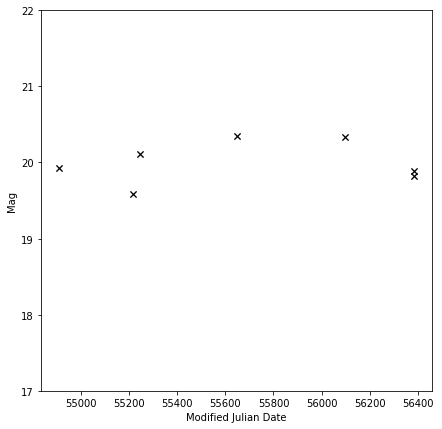

In [109]:
objID = df.ID.unique()[79]
obj_lightcurve = df[df.ID == objID]
plot_lightcurve(obj_lightcurve)
plt.savefig('nontransient_lightcurves.png')